In [ ]:
## メディア演習1 画像情報処理　0 まずは説明
## 画像のカメラからの取り込みとそのコピー
## まずはこれをよく理解すること

import numpy as np
import cv2
import matplotlib.pyplot as plt
import IPython
import time

In [ ]:
# カメラオープン
#cap = cv2.VideoCapture(3)

# カメラを使えない場合はこちら
# 自動ループしないので，ビデオが終了したあとはこのセルを再実行すること
cap = cv2.VideoCapture("sen.mp4")

In [ ]:
## 結果・入力画像表示用の関数
## 必要に応じて書き換え
## 今回は基本的には書き換える必要はない

def update_disp(disp,image):
    _, enc = cv2.imencode(".jpg",image)
    disp.update(IPython.display.Image(data=enc.tobytes()))

## 何も表示しないためのプロセス
def zero(src, args=[]):
    return np.zeros(src.shape, dtype=np.uint8)

def image_show(process=zero, args=[]):
    ## 入力画像表示用ディスプレイ
    disp = IPython.display.display("Input",display_id=1)
    ## 結果画像表示用ディスプレイ
    disp2 = IPython.display.display("Result",display_id = 2)
    while cap.isOpened():
        try:
            ret, frame = cap.read()
            if ret is False:
                break
            # 入力画像と結果画像の表示を更新
            update_disp(disp,frame)
            update_disp(disp2, process(frame, args))
            time.sleep(1.0/30)

        except KeyboardInterrupt:
            break


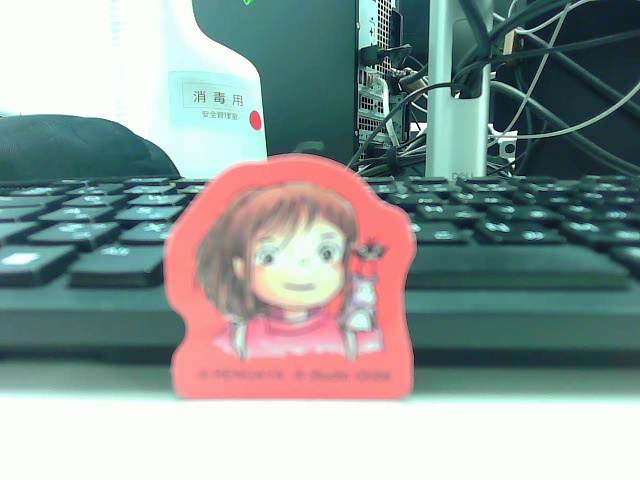

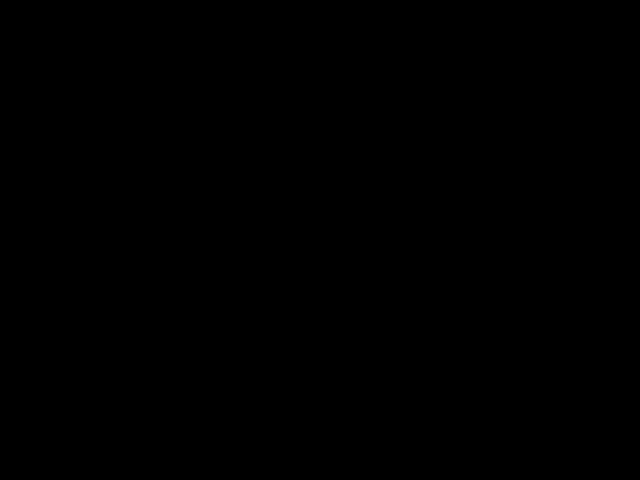

In [ ]:
## 画像表示のテスト
## 動画が表示されていればOK
## 適切に表示されない場合は，カメラの接続を確認すること．
## うまく表示されない場合の対処方法は，資料参照

image_show()

## 結果画像を表示させる場合は以下のように使う
## image_show(process, args)
## このとき，process は以下の形式を取る
## process(img, args) で結果画像を return
## 必ず2つの引数を持たなければならない，引数が不要の場合は以下のように初期値を与える（与えられない時，自動的にそれになる）
## process(img , args = [])
## 2つ以上の場合は，配列などで与える
## process(img, [theta, s, t]
## など．
## 以下の例で試してみること

In [ ]:
## BGR を RGBに変換して表示
def imshow(plt, img):
    plt.imshow(img[:,:,::-1])

width = 640
height = 480
channels = 3


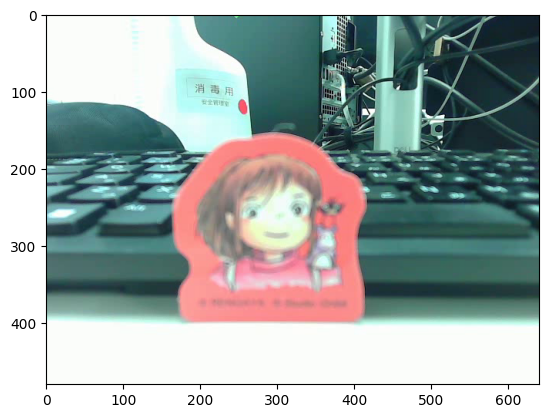

In [ ]:
## 画像を１枚取り込んで表示する．
## ここまでは共通

## 画像は numpy 形式で保持される．
ret, src = cap.read()

## 画像の読み込みが成功した場合は ret に True が代入される．
if (ret == True):
    imshow(plt,src)
    ## 画像サイズ等の情報は，src.shape に記録されている
    ## numpy は行列（等）を保持する形式のため，[行（高さ），列（幅），チャネル数] の順番で保存される
    ## また，チャネル数とは画像がカラー画像の場合は3，グレースケール画像の場合は1となる．
    ## 詳しくは講義資料等を確認すること
    print("width = %d" % src.shape[1])
    print("height = %d" % src.shape[0])
    print("channels = %d" % src.shape[2])
    # cv2.imwrite('before_conversion_1.png', src)
else:
    print("Image cannot be captured. Check camera connection")


True

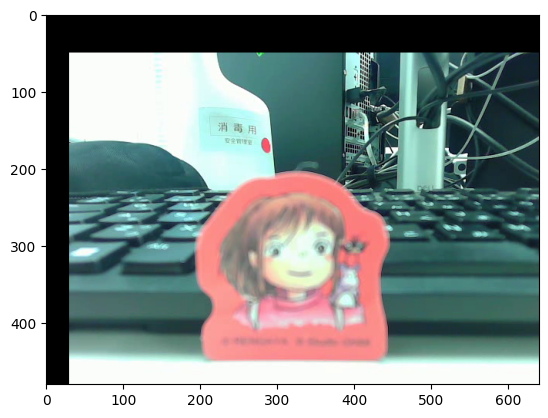

In [ ]:
## 課題　1-1
## 与えられた並進パラメタに従って，画像を並進させるコードを作成せよ．

# 順変換
def image_translation(src,args=[0,0]):
    ## trans は配列として与えること
    trans = args[0:2]

    dst = np.zeros(src.shape,dtype=np.uint8)
    ## ここに適切なコードを記載せよ
    for y in range (src.shape[0]):
        for x in range(src.shape[1]):
            new_x = x + trans[0]
            new_y = y + trans[1]
            for c in range(src.shape[2]):
                if 0 <= new_x < src.shape[1] and 0 <= new_y < src.shape[0]:
                    dst[new_y, new_x, c] = src[y, x, c]
    return dst

# 逆変換
def image_translation_reverse(src, args=[0,0]):
    trans = args[0:2]

    dst = np.zeros(src.shape, dtype=np.uint8)
    for y in range (src.shape[0]):
        for x in range(src.shape[1]):
            new_x = x - trans[0]
            new_y = y - trans[1]
            for c in range(src.shape[2]):
                if 0 <= new_x < src.shape[1] and 0 <= new_y < src.shape[0]:
                    dst[y, x,c] = src[new_y, new_x, c]
    return dst
##
dst = image_translation_reverse(src,[30, 50])
imshow(plt, dst)
#cv2.imwrite('1-1_30to50-r.jpg', dst)

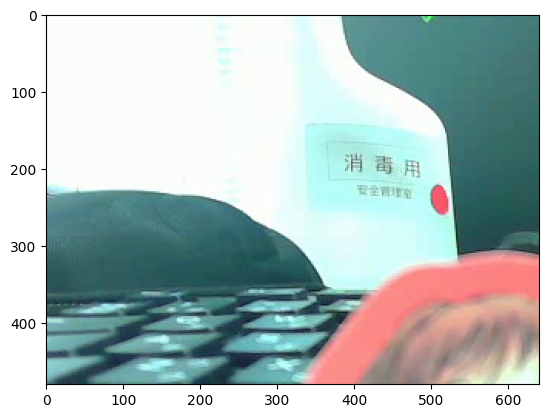

In [ ]:
## 課題　2-2
## 与えられたスケールパラメタに従って，画像を拡大・縮小させるコードを作成せよ．
## 拡大に際して，元画像の座標を返還先画像の座標へ変換し，それにしたがって拡大を行うとどのような問題が発生するかを確認せよ
## また，その結果を確認した後，資料の内容に従って，変換先から変換元の座標を計算するようにプログラムを書き換えること

# 順変換
def image_scale(src, args=[0]):
    scale = args[0]
    dst = np.zeros(src.shape,dtype=np.uint8)
    ## ここに適切なコードを記載せよ
    for y in range (src.shape[0]):
        for x in range(src.shape[1]):
            scl_x = int (x * scale)
            scl_y = int (y * scale)
            for c in range(src.shape[2]):
                if 0 <= scl_x < src.shape[1] and 0 <= scl_y < src.shape[0]:
                    dst[scl_y, scl_x, c] = src[y, x, c]
    return dst

# 逆変換
def image_scale_reverse(src, args=[0]):
    scale = args[0]
    dst = np.zeros(src.shape,dtype=np.uint8)
    ## ここに適切なコードを記載せよ
    for y in range (src.shape[0]):
        for x in range(src.shape[1]):
            scl_x = int (x / scale)
            scl_y = int (y / scale)
            for c in range(src.shape[2]):
                if 0 <= scl_x < src.shape[1] and 0 <= scl_y < src.shape[0]:
                    dst[y, x, c] = src[scl_y, scl_x, c]
    return dst
dst = image_scale_reverse(src, [2])
imshow(plt, dst)
#cv2.imwrite('1-2_double-r.jpg', dst)

True

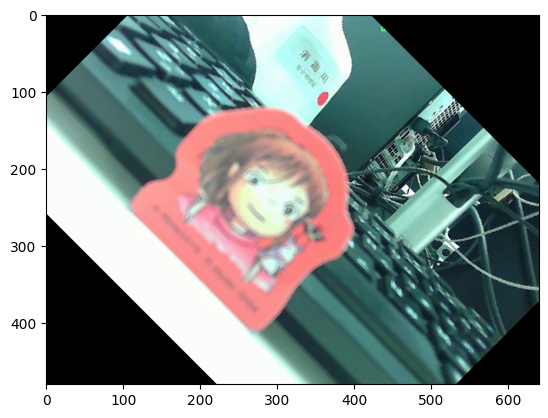

In [ ]:
## 課題　2-3
## 与えられた回転パラメタに従って画像を回転させるプログラムを作成せよ
## また，回転中心を画像の中心とするにはどのようにすればよいかを考え，それを実装せよ．

#アフィン変換
def image_rotate(src, args=[0]):
    ## theta については radian ではなく，degree が与えられるものとすること
    theta = np.deg2rad(args[0])
    dst = np.zeros(src.shape,dtype=np.uint8)
    ## ここに適切なコードを記載せよ
    center_x = src.shape[1] / 2
    center_y = src.shape[0] / 2
    for y in range (src.shape[0]):
        for x in range(src.shape[1]):
            dx = x - center_x
            dy = y - center_y
            for c in range(src.shape[2]):
                rot_x = int(round(np.cos(theta) * dx - np.sin(theta) * dy + center_x))
                rot_y = int(round(np.sin(theta) * dx + np.cos(theta) * dy + center_y))
                if 0 <= rot_x < src.shape[1] and 0 <= rot_y < src.shape[0]:
                    dst[rot_y, rot_x, c] = src[y, x, c]
    return dst


#アフィン逆変換
def image_rotate_reverse(src, args=[0]):
    # 入力画像のサイズ取得
    h, w, c = src.shape
    dst = np.zeros_like(src)

    # 回転角を度→ラジアンに変換
    theta_deg = args[0]
    theta = np.deg2rad(theta_deg)

    # 回転中心（画像の中心）
    cx = w / 2
    cy = h / 2

    # アフィン逆変換行列（回転）
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    for y_dst in range(h):
        for x_dst in range(w):
            # 出力座標を原点中心で逆回転 → 元の画像座標へ
            x_shifted = x_dst - cx
            y_shifted = y_dst - cy

            x_src =  cos_theta * x_shifted + sin_theta * y_shifted + cx
            y_src = -sin_theta * x_shifted + cos_theta * y_shifted + cy

            x_src = int(round(x_src))
            y_src = int(round(y_src))

            if 0 <= x_src < w and 0 <= y_src < h:
                dst[y_dst, x_dst] = src[y_src, x_src]

    return dst

dst = image_rotate_reverse(src, [45])
imshow(plt, dst)
cv2.imwrite('theta45-r.jpg', dst)

True

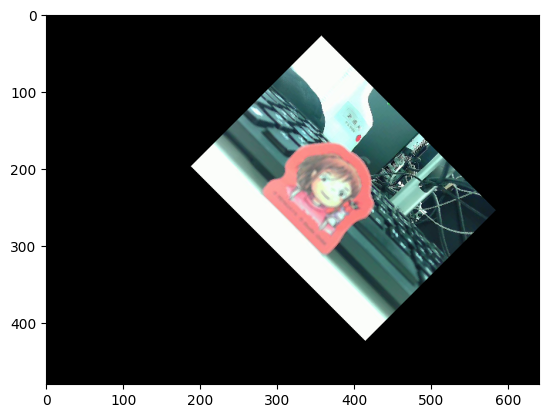

In [ ]:
## 課題　2-4
## 上を組み合わせることで，回転，並進，拡大をすべて行えるプログラムを作成せよ．

def image_affine(src, args=[0, 0, 1, 0]):
    ## params の中身は以下の通りとする．
    ## [tx, ty, scale, theta]
    ## tx, ty : 並進量
    ## scale: スケールパラメタ
    ## theta : 回転角度（degree）

    dst = np.zeros(src.shape,dtype=np.uint8)
    ## ここに適切なコードを記載せよ
    tx, ty, scale, theta = args
    theta = np.deg2rad(theta)
    center_x = src.shape[1] / 2
    center_y = src.shape[2] / 2
    for y in range (src.shape[0]):
        for x in range(src.shape[1]):
            xt = x - tx
            yt = y - ty
            dx = xt - center_x
            dy = yt - center_y

            scl_x = (np.cos(theta) * dx + np.sin(theta) * dy) / scale + center_x
            scl_y = (-np.sin(theta) * dx + np.cos(theta) * dy) / scale + center_y

            # 最も近いピクセルを参照（最近傍補間）
            scl_x = int(round(scl_x))
            scl_y = int(round(scl_y))

            if 0 <= scl_x < src.shape[1] and 0 <= scl_y < src.shape[0]:
                dst[y, x] = src[scl_y, scl_x]
    return dst

dst = image_affine(src, [150,140,0.5,45])
imshow(plt, dst)
cv2.imwrite('1-4.jpg', dst)

In [ ]:
## 発展課題
## 2-5 せん断変形
## 2次元のせん断変形について調査し，実装せよ．また，その効果について確認せよ．

def image_shear(src, mat):
    dst = np.zeros(src.shape,dtype=np.uint8)
    ## ここに適切なコードを記載せよ

    return dst

dst = image_shear(src, np.eye(3))
imshow(plt, dst)

In [ ]:
## 課題　2-5
## 発展課題
## 3x3の変換行列が与えられたとき，変換行列に従って射影変換を行うコードを作成せよ

def image_homography(src, mat):
    ## mat は 3x3 射影変換行列

    dst = np.zeros(src.shape,dtype=np.uint8)
    ## ここに適切なコードを記載せよ

    return dst

dst = image_homography(src, np.eye(3))
imshow(plt, dst)

In [ ]:
## 課題 2-6
## 発展課題
## ファンシーインデックスを用いた代入により高速に画像の変換を行うプログラムを作成せよ

## 単純にコピーを実施する場合，配列の要素としてすべての画素の座標を並べている．
def create_map(shape):
    mapping = np.zeros([2,shape[0] * shape[1]],dtype=np.int32)
    for y in range (shape[0]):
        for x in range (shape[1]):
            mapping[0,y*shape[1]+x] = y
            mapping[1,y*shape[1]+x] = x
    return mapping
mapping = create_map(src.shape)


In [ ]:
## 並べられた座標を用いて画像のコピーを実施．
## この例の場合は同一の座標にコピーしているため，単純な画像コピー
def image_trans_map(src, args = []):
    mapping=args[0]
    dst = np.zeros(src.shape,dtype=np.uint8)
    dst[mapping[0],mapping[1],:] = src[mapping[0],mapping[1],:]
    return dst

dst = image_trans_map(src,mapping)
imshow(plt, dst)


NameError: name 'mapping' is not defined

In [ ]:
## 作成した関数を用いてリアルタイムでの動作を確認せよ
## image_show に与える関数を変化させて，動作を確認せよ．
## 下の例はコピーをそのまま表示

image_show(image_trans_map, [mapping])

NameError: name 'image_trans_map' is not defined